In [24]:
%pip install langdetect
%pip install pandas
%pip install spacy
%pip install scikit-learn
%pip install bs4
%pip install nltk
%pip install xgboost
%pip install catboost

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Mestrado\Python\Projeto\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Mestrado\Python\Projeto\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Mestrado\Python\Projeto\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Mestrado\Python\Projeto\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Mestrado\Python\Projeto\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Mestrado\Python\Projeto\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Mestrado\Python\Projeto\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Mestrado\Python\Projeto\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


In [1]:
from langdetect import detect
import pandas as pd
import spacy

In [2]:
# Carregar o modelo de idioma inglês
nlp = spacy.load("en_core_web_sm")

# Função para detectar o idioma usando o Spacy
def detect_language(text):
    doc = nlp(text)
    return doc.lang_

def contar_frases(text):
  if text is not None and len(text.strip()) > 0:  # Verifica se o texto não é nulo e contém conteúdo significativo
      doc = nlp(text)
      return len(list(doc.sents))
  else:
      return 0  # Retorna 0 se o texto for inválido ou vazio
        
# Função para contar o número de palavras em uma descrição usando spaCy
def contar_palavras(text):
    if text is not None and len(text.strip()) > 0:  # Verifica se o texto não é nulo e contém conteúdo significativo
        doc = nlp(text)
        return len(list(doc))
    else:
        return 0  # Retorna 0 se o texto for inválido ou vazio

In [3]:
# Lendo Dados
dados_gerais = pd.read_csv('C:\\Users\\rodri\\Downloads\\JiraRepos.JiraEcosystem.csv')

# Aplicar a função de detecção de idioma à coluna 'fields.description' e armazenar o resultado em uma nova coluna
dados_gerais['lang'] = dados_gerais['fields.description'].apply(lambda x: detect_language(str(x)))

# Filtrar apenas os registros onde o idioma detectado é inglês
dados= dados_gerais[dados_gerais['lang'] == 'en']

# Selecionar apenas as colunas 'fields.description', 'fields.timeestimate' e 'id'
dados_filtrados = dados[['fields.description', 'fields.timeestimate', 'id']]

dados_filtrados.head()

,fields.description,fields.timeestimate,id
0,Encountered this plugin within the ecosystem.a...,14400,134767
1,Reference to ${req.contextPath} in the files v...,1800,70685
2,This test started failing when UPM-1020 was im...,14400,41030
3,I verified in PAC that Atlassian Connector for...,7200,40983
4,"This means that if you start on a tab, switch ...",7200,40932


In [5]:
# Total de Registros
total_registros = len(dados_filtrados)

In [6]:
# Contando o número de frases em cada descrição
dados_filtrados['num_frases'] = dados_filtrados['fields.description'].apply(lambda x: contar_frases(str(x)))

C:\Users\rodri\AppData\Local\Temp\ipykernel_16840\3834843983.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_filtrados['num_frases'] = dados_filtrados['fields.description'].apply(lambda x: contar_frases(str(x)))


In [ ]:
# Total de Frases
total_frases = dados_filtrados['num_frases'].sum()

In [ ]:
# Média e Desvio Padrão de Frases
media_frases = dados_filtrados['num_frases'].mean()
desvio_padrao_frases = dados_filtrados['num_frases'].std()

In [ ]:
# Contando o número de palavras em cada descrição
dados_filtrados['num_palavras'] = dados_filtrados['fields.description'].apply(lambda x: contar_palavras(str(x)))

In [ ]:
# Total de Palavras
total_palavras = dados_filtrados['num_palavras'].sum()

In [ ]:
# Média e Desvio Padrão de Palavras
media_palavras = dados_filtrados['num_palavras'].mean()
desvio_padrao_palavras = dados_filtrados['num_palavras'].std()

In [ ]:
# Exibindo os resultados
print(f"Total de Registros: {total_registros}")
print(f"Total de Frases: {total_frases}")
print(f"Média de Frases por Registro: {media_frases:.2f}")
print(f"Desvio Padrão de Frases por Registro: {desvio_padrao_frases:.2f}")
print(f"Total de Palavras: {total_palavras}")
print(f"Média de Palavras por Registro: {media_palavras:.2f}")
print(f"Desvio Padrão de Palavras por Registro: {desvio_padrao_palavras:.2f}")

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from tqdm import tqdm
from unicodedata import normalize

In [5]:
from bs4 import BeautifulSoup
import re
import nltk
from nltk.stem import PorterStemmer
from collections import Counter

def preprocessar_descricao(list_descricao):
    descricao_2 = []

    with tqdm(total=len(list_descricao),
        desc='Processando Descrição') as pbar:
    
        for descricao in list_descricao:
            descricao_processada = BeautifulSoup(descricao, 'html.parser').get_text()
            doc = nlp(descricao_processada)
            tokens = [t.lemma_.lower() for t in doc if t.pos_ != 'PUNCT'
                        and len(t.lemma_) > 1 and not t.is_stop]
            descricao_processada = ' '.join(tokens).strip()
            descricao_2.append(descricao_processada)
            pbar.update(1)

    return descricao_2

# Definindo os dados de entrada e saída
X = preprocessar_descricao(dados_filtrados['fields.description'].values)
y = dados_filtrados['fields.timeestimate'].values

Processando Descrição:   0%|          | 0/1066 [00:00<?, ?it/s]C:\Users\rodri\AppData\Local\Temp\ipykernel_2768\1950722891.py:14: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  descricao_processada = BeautifulSoup(descricao, 'html.parser').get_text()
Processando Descrição:   3%|▎         | 27/1066 [00:00<00:31, 33.05it/s]C:\Users\rodri\AppData\Local\Temp\ipykernel_2768\1950722891.py:14: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  descricao_processada = BeautifulSoup(descricao, 'html.parser').get_text()
Processando Descrição: 100%|██████████| 1066/1066 [00:20<00:00, 52.82it/s]



Total Examples: 1066 -- 1066


Min Estimation: 60
Max Estimation: 648000


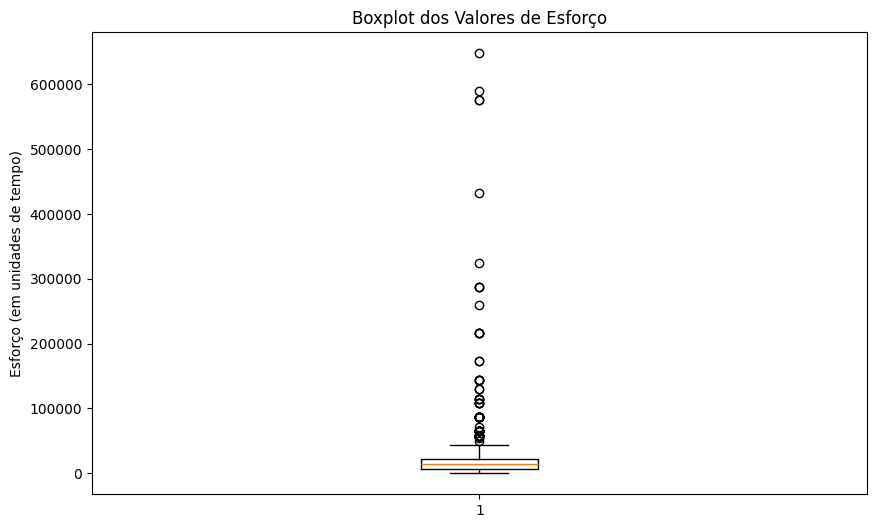

Outliers:
[ 64800  64800 259200  57600  86400 115200  57600 288000 216000 216000
  64800  64800 129600  86400  57600  72000 115200  86400 108000  57600
  86400  64800  57600  57600  57600  57600  57600  57600  57600  57600
  57600 144000  57600 115200  64800  64800  57600  64800  50400  86400
 172800 172800  86400 108000  54000  64800 129600  86400 144000 432000
 288000 576000 288000 144000 144000 576000  86400  57600 108000  86400
  86400  57600  86400  57600  57600  86400  86400 115200  86400  57600
  57600  57600  57600  86400  57600  57600  86400  64800  64800  86400
 216000  64800  64800  57600  64800 324000  64800  64800 648000 216000
  86400  86400  86400 108000  64800 590400  86400]
Lower Bound: -14400.0
Upper Bound: 43200.0


In [14]:
import numpy as np
import matplotlib.pyplot as plt

descriptions = dados_filtrados['fields.description'].values
effort_estimations = dados_filtrados['fields.timeestimate'].values

min_effort = min(effort_estimations)
max_effort = max(effort_estimations)

effort_estimations = np.array(effort_estimations)

print(f'\nTotal Examples: {len(descriptions)} -- {len(effort_estimations)}\n')
print(f'\nMin Estimation: {min_effort}')
print(f'Max Estimation: {max_effort}')

# Boxplot dos valores de esforço
plt.figure(figsize=(10, 6))
plt.boxplot(effort_estimations)
plt.title('Boxplot dos Valores de Esforço')
plt.ylabel('Esforço (em unidades de tempo)')
plt.show()

# Calcular os quartis e o IQR
Q1 = np.percentile(effort_estimations, 25)
Q3 = np.percentile(effort_estimations, 75)
IQR = Q3 - Q1

# Determinar os limites inferior e superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers
outliers = effort_estimations[(effort_estimations < lower_bound) | (effort_estimations > upper_bound)]

print(f"Outliers:\n{outliers}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")



Total Examples After Removing Outliers: 969 -- 969


Total Examples Removed: 97



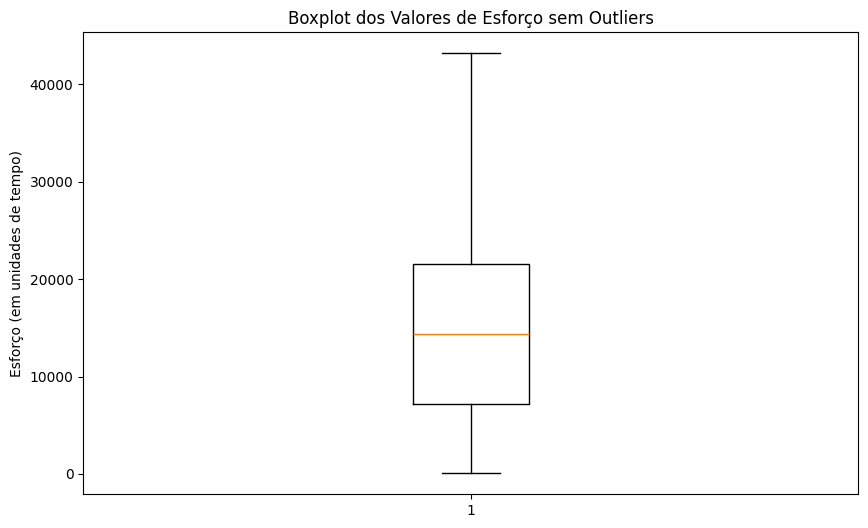

In [17]:
# Remover os outliers
filtered_effort_estimations = effort_estimations[(effort_estimations >= lower_bound) & (effort_estimations <= upper_bound)]
filtered_descriptions = descriptions[(effort_estimations >= lower_bound) & (effort_estimations <= upper_bound)]

print(f'\nTotal Examples After Removing Outliers: {len(filtered_descriptions)} -- {len(filtered_effort_estimations)}\n')
print(f'\nTotal Examples Removed: {len(effort_estimations) - len(filtered_effort_estimations)}\n')

# Boxplot dos valores de esforço sem outliers
plt.figure(figsize=(10, 6))
plt.boxplot(filtered_effort_estimations)
plt.title('Boxplot dos Valores de Esforço sem Outliers')
plt.ylabel('Esforço (em unidades de tempo)')
plt.show()



In [25]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, root_mean_squared_error
from scipy.stats import pearsonr


# Definir os modelos com max_iter ajustado para Lasso
models = [
    ('Linear Regression', LinearRegression(), None),
    ('Ridge Regression', Ridge(), {'regressor__alpha': [0.1, 1.0, 10.0, 100.0]}),
    ('Lasso Regression', Lasso(max_iter=100000, tol=0.01), {'regressor__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]}),
    ('ElasticNet Regression', ElasticNet(max_iter=100000), {'regressor__alpha': [0.1, 1.0, 10.0, 100.0], 'regressor__l1_ratio': [0.1, 0.5, 0.9]}),
    ('SVR', SVR(), {'regressor__C': [0.1, 1.0, 10.0], 'regressor__epsilon': [0.01, 0.1, 1.0]}),
    ('KNN', KNeighborsRegressor(), {'regressor__n_neighbors': [3, 5, 7, 9]}),
    ('Decision Tree', DecisionTreeRegressor(), {'regressor__max_depth': [None, 10, 20, 30]}),
    ('XGBoost', XGBRegressor(), {'regressor__n_estimators': [100, 200], 'regressor__learning_rate': [0.01, 0.1, 0.3]}),
    ('CatBoost', CatBoostRegressor(silent=True), {'regressor__iterations': [100, 200], 'regressor__learning_rate': [0.01, 0.1, 0.3]})
]

# Criando um pipeline com vetorização de texto, normalização e modelo de regressão
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 1), max_features=1_000)),
    ('normalizer', Normalizer()),  # Normalizar os dados
    ('regressor', None)
])

# Usando KFold para validação cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Dicionário para armazenar os resultados
results = {
    'Model': [],
    'MAE': [],
    'R2': [],
    'RMSE': [],
    'Pearson Correlation': []
}

# Avaliação dos modelos com as novas métricas
for name, model, param_grid in models:
    pipeline.set_params(regressor=model)
    print(f"\nModel: {name}")
    regressor = None
    if param_grid:
        regressor = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
    else:
        regressor = pipeline
    list_maes_scores = []
    list_r2_scores = []
    list_rmse_scores = []
    list_pearson_scores = []
    for train_index, test_index in kf.split(filtered_descriptions):
        X_train, X_test = filtered_descriptions[train_index], filtered_descriptions[test_index]
        y_train, y_test = filtered_effort_estimations[train_index], filtered_effort_estimations[test_index]
        regressor.fit(X_train, y_train)
        y_pred = regressor.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        try:
            pearson_corr, _ = pearsonr(y_test, y_pred)
        except Exception as e:
            print(f"Warning: {e}")
            pearson_corr = float('nan')
        list_maes_scores.append(mae)
        list_r2_scores.append(r2)
        list_rmse_scores.append(rmse)
        list_pearson_scores.append(pearson_corr)
    results['Model'].append(name)
    results['MAE'].append(f"{np.mean(list_maes_scores)} ± {np.std(list_maes_scores)}")
    results['R2'].append(f"{np.mean(list_r2_scores)} ± {np.std(list_r2_scores)}")
    results['RMSE'].append(f"{np.mean(list_rmse_scores)} ± {np.std(list_rmse_scores)}")
    results['Pearson Correlation'].append(f"{np.mean(list_pearson_scores)} ± {np.std(list_pearson_scores)}")

# Criar um DataFrame com os resultados
results_df = pd.DataFrame(results)
print("\nResultados:")
print(results_df)



Model: Linear Regression

Model: Ridge Regression

Model: Lasso Regression

Model: ElasticNet Regression

Model: SVR

Model: KNN

Model: Decision Tree

Model: XGBoost

Model: CatBoost

Resultados:
                   Model                                      MAE  \
0      Linear Regression    46677.30314636153 ± 2877.313114396741   
1       Ridge Regression   7972.683613593962 ± 353.53170218199756   
2       Lasso Regression    8353.034071026485 ± 575.7440601212669   
3  ElasticNet Regression   7964.6467739958225 ± 353.3141210729667   
4                    SVR    7738.253015480691 ± 381.1328722769058   
5                    KNN     8274.40532022862 ± 444.4558635847075   
6          Decision Tree      8979.35428530761 ± 624.268297074843   
7                XGBoost   7933.835216770689 ± 418.51154410933566   
8               CatBoost  8090.1618148458265 ± 438.01844334717276   

                                              R2  \
0         -32.34425592805424 ± 6.884827071412777   
1     0

In [26]:
results_df.head(10)

,Model,MAE,R2,RMSE,Pearson Correlation
0,Linear Regression,46677.30314636153 ± 2877.313114396741,-32.34425592805424 ± 6.884827071412777,63017.37139075155 ± 4885.718582860105,0.027960309886588562 ± 0.07890750301279334
1,Ridge Regression,7972.683613593962 ± 353.53170218199756,0.05655913743211605 ± 0.012517131569159495,10682.61965514458 ± 492.8648259406298,0.2785458039851244 ± 0.05017204028971221
2,Lasso Regression,8353.034071026485 ± 575.7440601212669,-0.021037664737553908 ± 0.09425135196986602,11099.229387000309 ± 675.8374873838483,0.22481395922938105 ± 0.08782066341236433
3,ElasticNet Regression,7964.6467739958225 ± 353.3141210729667,0.06288200620515934 ± 0.015546553301776693,10646.66640838196 ± 494.3608339470568,0.2804681198784552 ± 0.05309380210578591
4,SVR,7738.253015480691 ± 381.1328722769058,-0.007954989935099955 ± 0.0035544443635493294,11041.828678276199 ± 501.35195539716324,0.26199373085301436 ± 0.03738662494582802
5,KNN,8274.40532022862 ± 444.4558635847075,-0.0338847410204113 ± 0.04596351415252337,11188.510013306575 ± 713.3741356280952,0.1610858179563726 ± 0.059717718794927
6,Decision Tree,8979.35428530761 ± 624.268297074843,-0.30249122351597313 ± 0.11486754069973845,12538.057467937713 ± 749.9450305398758,0.08137721305440933 ± 0.12253277254125534
7,XGBoost,7933.835216770689 ± 418.51154410933566,0.033502045992743645 ± 0.040731183519058196,10810.151687497822 ± 538.0227499725719,0.1829471990308284 ± 0.10870479488837873
8,CatBoost,8090.1618148458265 ± 438.01844334717276,0.019556995913885888 ± 0.033760656166751245,10887.81206843923 ± 508.35806840542233,0.22804343885058143 ± 0.09233560504990852
